In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_profiling

In [3]:
birth=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/births.csv')

In [4]:
birth

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [5]:
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
birth.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [7]:
birth['decade']=10*(birth['year']//10)
birth

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [9]:
birth.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


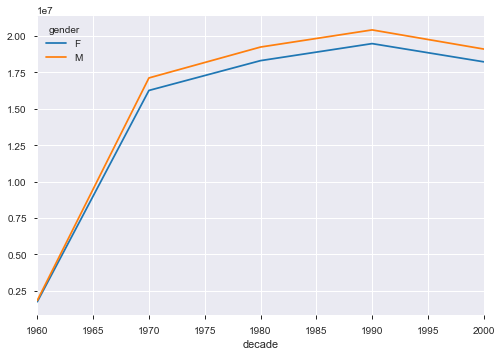

In [10]:
birth.pivot_table('births',index='decade',columns='gender',aggfunc='sum').plot()

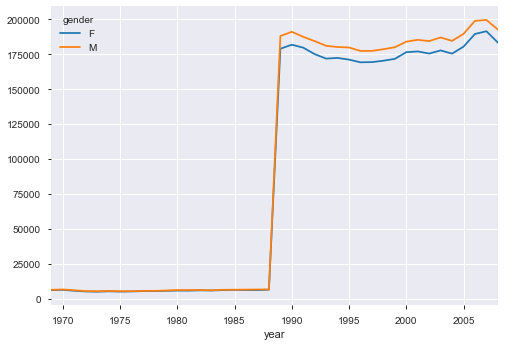

In [11]:
birth.pivot_table('births',index='year',columns='gender',aggfunc='max').plot()

In [12]:
x=np.arange(1,9)
x

array([1, 2, 3, 4, 5, 6, 7, 8])

{'whiskers': [<matplotlib.lines.Line2D at 0x2985bbedfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2985bbf2f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2985bbed4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2985bbf8f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2985bbf8c88>],
 'means': []}

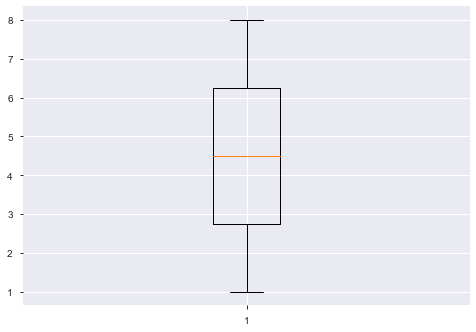

In [13]:
plt.boxplot(x)

In [17]:
quartiles=np.percentile(x,25,interpolation='midpoint')  # Take mean value ord
quartiles

2.5

In [18]:
quartiles=np.percentile(x,75,interpolation='linear')  # Even
quartiles

6.25

In [20]:
birth['births'].median()

4814.0

In [21]:
quartiles=np.percentile(birth['births'],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [23]:
mu=quartiles[1]
mu

4814.0

In [24]:
sig=0.74*(quartiles[2]-quartiles[0])
sig

689.31

In [25]:
birth=birth.query('(births>@mu-5*@sig) & (births<@mu+5*@sig)')

In [26]:
birth

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [27]:
birth['day']=birth['day'].astype(int)

c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
birth.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [31]:
birth.isnull().describe()

,year,month,day,gender,births,decade
count,14610,14610,14610,14610,14610,14610
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,14610,14610,14610,14610,14610,14610


In [29]:
birth.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

In [35]:
birth.index=pd.to_datetime(10000*birth.year+
                          100*birth.month+
                          birth.day,format='%Y%m%d')
birth['dayofweek']=birth.index.dayofweek
birth

c:\users\91833\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


Text(0, 0.5, 'mean birth by day')

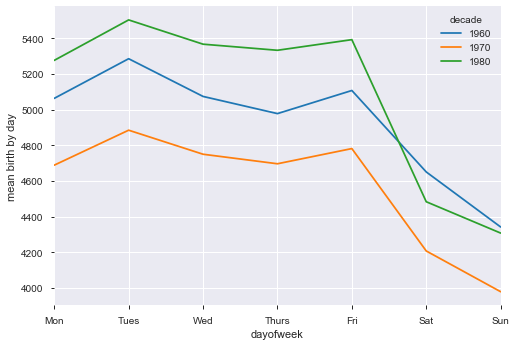

In [40]:
#import matplotlib as mpl
birth.pivot_table('births',index='dayofweek',columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('mean birth by day')

In [41]:
birth_by_date=birth.pivot_table('births',[birth.index.month,birth.index.day])
birth_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [42]:
birth_by_date.index=[pd.datetime(2012,month,day) for (month,day) in birth_by_date.index]
birth_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


In [44]:
birth_by_date.tail()

,births
2012-12-27,4850.15
2012-12-28,5044.20
2012-12-29,5120.15
2012-12-30,5172.35
2012-12-31,4859.20


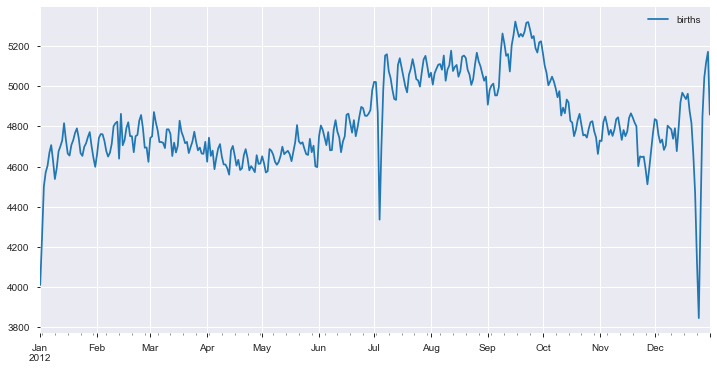

In [45]:
fig,ax=plt.subplots(figsize=(12,6))
birth_by_date.plot(ax=ax);